In [6]:
import pandas as pd
import numpy as np

# Load the specific sheet from the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Check unique values in 'CO' and 'PM2.5' columns
print("Unique values in 'CO':\n", df['CO'].unique())
print("\nUnique values in 'PM2.5':\n", df['PM2.5'].unique())

# Convert 'CO' and 'PM2.5' columns to numeric, coercing errors
df['CO'] = pd.to_numeric(df['CO'], errors='coerce')
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

# Remove rows with NaN values in 'CO' and 'PM2.5'
df.dropna(subset=['CO', 'PM2.5'], inplace=True)

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter data for each period
df_before_fire = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
df_during_fire = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
df_after_fire = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Set 'From Date' as the index for resampling
df_before_fire.set_index('From Date', inplace=True)
df_during_fire.set_index('From Date', inplace=True)
df_after_fire.set_index('From Date', inplace=True)

# Resample the data for each period to 3-hour intervals and calculate the mean
mean_before_fire = df_before_fire.resample('3H').mean(numeric_only=True)  # Ensuring only numeric columns are averaged
mean_during_fire = df_during_fire.resample('3H').mean(numeric_only=True)
mean_after_fire = df_after_fire.resample('3H').mean(numeric_only=True)

# Reset the index to make 'From Date' a column again
mean_before_fire.reset_index(inplace=True)
mean_during_fire.reset_index(inplace=True)
mean_after_fire.reset_index(inplace=True)

# Display the means for each period
print("Mean values before fire:\n", mean_before_fire[['From Date', 'CO', 'PM2.5']].head())
print("\nMean values during fire:\n", mean_during_fire[['From Date', 'CO', 'PM2.5']].head())
print("\nMean values after fire:\n", mean_after_fire[['From Date', 'CO', 'PM2.5']].head())


Unique values in 'CO':
 [1.   0.9  0.8   nan 0.7  0.6  0.5  0.4  1.1  1.2  0.3  1.3  1.8  1.5
 1.7  1.6  1.4  2.   2.1  2.2  2.3  2.4  2.6  3.   2.9  1.9  0.2  1.11
 1.12 1.15 1.16 1.13 1.06 1.27 1.18 1.25 1.32 1.39 1.42 1.43 1.49 1.57
 1.58 1.51 1.24 1.19 1.23 1.17 1.26 1.05 0.57 0.55 0.54 0.56 0.62 0.61
 0.58 0.64 0.66 0.69 0.71 0.72 0.78 0.85 0.97 0.96 1.04 1.28 1.81 2.15
 2.21 2.14 1.85 1.65 1.52 0.94 0.93 0.95 1.01 1.03 1.09 0.79 0.86 0.84
 0.73 0.68 0.53 0.52 0.39 0.37 0.47 0.49 0.48 0.65 0.74 0.77 0.81 1.02
 0.98 1.35 1.29 1.21 1.45 1.48 1.33 1.34 1.41 1.56 1.74 1.84 1.92 1.96
 2.03 2.05 1.98 0.45 0.44 0.42 0.46 0.63 0.82 0.87 0.92 1.36 1.47 1.37
 0.38 0.34 0.76 0.88 1.31 1.55 1.64 1.68 1.76 1.87 1.82 1.95 1.97 2.08
 2.13 2.39 2.82 3.06 3.48 3.21 2.83 3.22 2.95 2.84 1.99 1.94 1.44 0.31
 0.22 0.18 0.15 0.14 0.11 0.09 0.89 1.08 0.41 0.35 0.33 0.32 1.69 1.73
 1.71 1.67 2.16 2.36 2.31 2.47 2.35 2.43 2.42 2.38 1.61 1.79 1.89 2.61
 2.58 2.97 2.69 2.62 1.53 1.66 1.63 2.02 2.24 2.37 2.2

C:\Users\Admin\AppData\Local\Temp\ipykernel_52188\1768499361.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  mean_before_fire = df_before_fire.resample('3H').mean(numeric_only=True)  # Ensuring only numeric columns are averaged
C:\Users\Admin\AppData\Local\Temp\ipykernel_52188\1768499361.py:47: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  mean_during_fire = df_during_fire.resample('3H').mean(numeric_only=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_52188\1768499361.py:48: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  mean_after_fire = df_after_fire.resample('3H').mean(numeric_only=True)


In [42]:
# Get the maximum CO value
max_co_value = df['CO'].max()

# Get the corresponding date
corresponding_date = df[df['CO'] == max_co_value]['From Date'].values[0]

# Display the result
print(f"Maximum CO value: {max_co_value} µg/m³ on {corresponding_date}")


Maximum CO value: 7.72 µg/m³ on 2024-01-13T21:00:00.000000000


In [ ]:
Mean RP for each hour interval:
From 00:00 to 02:00: Mean RP = 72.6578
From 03:00 to 05:00: Mean RP = 63.7996
From 06:00 to 08:00: Mean RP = 49.7681
From 09:00 to 11:00: Mean RP = 48.7979
From 12:00 to 14:00: Mean RP = 62.6531
From 15:00 to 17:00: Mean RP = 62.2034
From 18:00 to 20:00: Mean RP = 29.0492
From 21:00 to 23:00: Mean RP = 41.7793

In [ ]:
From 00:00 to 04:00: Mean RP = 15.27
From 04:00 to 08:00: Mean RP =11.95
From 08:00 to 12:00: Mean RP =14.14
From 12:00 to 16:00: Mean RP =12.75
From 16:00 to 20:00: Mean RP =8.42
From 20:00 to 00:00: Mean RP =12.80

In [9]:
import pandas as pd
import numpy as np

# Load the specific sheet from the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with error coercion
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True, errors='coerce')

# Check for rows where 'From Date' could not be converted
invalid_dates = df[df['From Date'].isna()]
if not invalid_dates.empty:
    print("Invalid date entries found:")
    print(invalid_dates)

# Convert 'CO' and 'PM2.5' columns to numeric, coercing errors
df['CO'] = pd.to_numeric(df['CO'], errors='coerce')
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

# Remove rows with NaN values in 'CO' and 'PM2.5'
df.dropna(subset=['Ozone','Toluene','Benzene','CO', 'PM2.5'], inplace=True)

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define Mean RP values for each hour interval
hour_intervals = [
    (0, 4),   # 00:00 - 04:00
    (4, 8),   # 04:00 - 08:00
    (8, 12),  # 08:00 - 12:00
    (12, 16), # 12:00 - 16:00
    (16, 20), # 16:00 - 20:00
    (20, 24)  # 20:00 - 00:00
]

mean_rp_values = [15.27, 11.95, 14.14, 12.75, 8.42, 12.80]  # Mean RP values for each interval

# Create a new column for predicted PM2.5 values
df['PM2p5_Pred'] = np.nan

# Loop through each hour interval and calculate predicted PM2.5
for idx, (start_hour, end_hour) in enumerate(hour_intervals):
    # Create a mask for the current hour interval
    mask = (df['From Date'].dt.hour >= start_hour) & (df['From Date'].dt.hour < end_hour)
    
    # Calculate predicted PM2.5 values using the formula: PM2.5_Pred = CO * Mean RP
    df.loc[mask, 'PM2p5_Pred'] = df.loc[mask, 'CO'] * mean_rp_values[idx]

# Display the modified DataFrame with new 'PM2p5_Pred' values
print(df[['From Date','Ozone','Toluene','Benzene' ,'CO', 'PM2p5_Pred', 'PM2.5']])


Invalid date entries found:
      From Date  To Date   PM2.5  PM10  NO  NO2  NOx  NH3  SO2  CO  ...  \
27698       NaT      NaN     NaN   NaN NaN  NaN  NaN  NaN  NaN NaN  ...   
27699       NaT              NaN   NaN NaN  NaN  NaN  NaN  NaN NaN  ...   
27700       NaT              NaN   NaN NaN  NaN  NaN  NaN  NaN NaN  ...   
27701       NaT      NaN     NaN   NaN NaN  NaN  NaN  NaN  NaN NaN  ...   
27702       NaT  To Date  TOT-RF   NaN NaN  NaN  NaN  NaN  NaN NaN  ...   

       Toluene  Temp  RH  WS  WD  SR  BP  VWS  AT  RF  
27698      NaN   NaN NaN NaN NaN NaN NaN  NaN NaN NaN  
27699      NaN   NaN NaN NaN NaN NaN NaN  NaN NaN NaN  
27700      NaN   NaN NaN NaN NaN NaN NaN  NaN NaN NaN  
27701      NaN   NaN NaN NaN NaN NaN NaN  NaN NaN NaN  
27702      NaN   NaN NaN NaN NaN NaN NaN  NaN NaN NaN  

[5 rows x 22 columns]
                From Date  Ozone  Toluene  Benzene    CO  PM2p5_Pred  PM2.5
0     2024-01-01 00:00:00   29.3      1.8      0.6  1.00     15.2700  164.0
1     2024

In [2]:
df.keys()

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Temp', 'RH', 'WS', 'WD',
       'SR', 'BP', 'VWS', 'AT', 'RF', 'PM2p5_Pred'],
      dtype='object')

In [10]:
import pandas as pd

df['TVOC']= pd.to_numeric(df['Benzene'], errors='coerce')+pd.to_numeric(df['Toluene'], errors='coerce')
# Convert 'CO' and 'PM2.5' columns to numeric, coercing errors
df['CO'] = pd.to_numeric(df['CO'], errors='coerce')
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
df['PM2p5_Pred'] = pd.to_numeric(df['PM2p5_Pred'], errors='coerce')

# Remove rows with NaN values in relevant columns
df.dropna(subset=['CO', 'PM2.5', 'PM2p5_Pred'], inplace=True)

# Create a new column 'Difference' as the difference between 'PM2.5' and 'PM2p5_Pred'
df['Secondary_PM'] = df['PM2.5'] - df['PM2p5_Pred']

# Print the desired columns, including the new 'Difference' column
print(df[['From Date','NOx','TVOC', 'Ozone','CO', 'PM2p5_Pred', 'PM2.5', 'Secondary_PM']])


                From Date   NOx  TVOC  Ozone    CO  PM2p5_Pred  PM2.5  \
0     2024-01-01 00:00:00  38.7   2.4   29.3  1.00     15.2700  164.0   
1     2024-01-01 00:15:00  33.2   2.2   29.8  1.00     15.2700  164.0   
2     2024-01-01 00:30:00  26.1   2.2   29.9  0.90     13.7430  164.0   
3     2024-01-01 00:45:00  34.5   2.5   31.8  0.90     13.7430  182.0   
7     2024-01-01 01:45:00  26.1   2.4   30.8  0.80     12.2160  168.0   
...                   ...   ...   ...    ...   ...         ...    ...   
27683 2024-10-15 08:45:00  90.1   3.3    7.8  1.17     16.5438   92.0   
27684 2024-10-15 09:00:00  79.2   3.9   13.2  1.09     15.4126  116.0   
27685 2024-10-15 09:15:00  68.2   3.6   19.4  1.00     14.1400  116.0   
27686 2024-10-15 09:30:00  60.7   3.7   28.3  0.98     13.8572  116.0   
27687 2024-10-15 09:45:00  51.1   3.3   51.2  0.89     12.5846  116.0   

       Secondary_PM  
0          148.7300  
1          148.7300  
2          150.2570  
3          168.2570  
7          15

In [12]:
central_date = pd.Timestamp('2024-02-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter DataFrames for each period
before_fire_df = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
during_fire_df = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
after_fire_df = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Print the filtered DataFrames
print("Before Fire DataFrame:")
print(before_fire_df[['From Date', 'CO','NOx','TVOC', 'Ozone', 'PM2p5_Pred', 'PM2.5', 'Secondary_PM']])
print("\nDuring Fire DataFrame:")
print(during_fire_df[['From Date', 'CO','NOx','TVOC', 'Ozone', 'PM2p5_Pred', 'PM2.5', 'Secondary_PM']])
print("\nAfter Fire DataFrame:")
print(after_fire_df[['From Date', 'CO','NOx','TVOC', 'Ozone', 'PM2p5_Pred', 'PM2.5', 'Secondary_PM']])

Before Fire DataFrame:
               From Date    CO   NOx  TVOC  Ozone  PM2p5_Pred  PM2.5  \
4704 2024-02-19 00:00:00  0.66  45.6   2.4   25.2     10.0782  102.0   
4705 2024-02-19 00:15:00  0.69  44.7   2.2   20.8     10.5363  102.0   
4706 2024-02-19 00:30:00  0.72  43.2   2.1   25.9     10.9944  102.0   
4707 2024-02-19 00:45:00  0.68  41.7   2.2   27.9     10.3836  110.0   
4711 2024-02-19 01:45:00  0.58  38.0   2.0   30.9      8.8566   80.0   
...                  ...   ...   ...   ...    ...         ...    ...   
4892 2024-02-20 23:00:00  2.46  82.2   6.7    0.7     31.4880  117.0   
4893 2024-02-20 23:15:00  2.48  84.2   6.7    1.5     31.7440  117.0   
4894 2024-02-20 23:30:00  2.58  86.2   6.7    3.0     33.0240  117.0   
4895 2024-02-20 23:45:00  2.66  92.0   7.0    3.7     34.0480  125.0   
4896 2024-02-21 00:00:00  2.74  98.1   7.0    4.4     41.8398  125.0   

      Secondary_PM  
4704       91.9218  
4705       91.4637  
4706       91.0056  
4707       99.6164  
4711   

In [14]:
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter DataFrames for each period
before_fire_df = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
during_fire_df = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
after_fire_df = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Print the filtered DataFrames
print("Before Fire DataFrame:")
print(before_fire_df[['From Date', 'CO','NOx','TVOC', 'Ozone',  'PM2p5_Pred', 'PM2.5', 'Secondary_PM']])
print("\nDuring Fire DataFrame:")
print(during_fire_df[['From Date', 'CO','NOx','TVOC', 'Ozone',  'PM2p5_Pred', 'PM2.5', 'Secondary_PM']])
print("\nAfter Fire DataFrame:")
print(after_fire_df[['From Date', 'CO','NOx','TVOC', 'Ozone',  'PM2p5_Pred', 'PM2.5', 'Secondary_PM']])

Before Fire DataFrame:
                From Date    CO    NOx  TVOC  Ozone  PM2p5_Pred  PM2.5  \
10464 2024-04-19 00:00:00  2.92  104.8   8.9    4.0     44.5884   58.0   
10465 2024-04-19 00:15:00  2.64  106.7   9.0    5.9     40.3128   58.0   
10466 2024-04-19 00:30:00  2.56  109.1   8.6    5.5     39.0912   58.0   
10467 2024-04-19 00:45:00  2.47  114.5   8.3    5.3     37.7169   67.0   
10471 2024-04-19 01:45:00  2.55  114.1   7.7    6.1     38.9385   57.0   
...                   ...   ...    ...   ...    ...         ...    ...   
10652 2024-04-20 23:00:00  1.01   22.4   2.1   53.4     12.9280   34.0   
10653 2024-04-20 23:15:00  1.01   20.7   2.0   51.7     12.9280   34.0   
10654 2024-04-20 23:30:00  0.98   20.7   1.9   47.2     12.5440   34.0   
10655 2024-04-20 23:45:00  0.97   22.0   1.9   41.6     12.4160   30.0   
10656 2024-04-21 00:00:00  0.96   22.8   1.8   40.6     14.6592   30.0   

       Secondary_PM  
10464       13.4116  
10465       17.6872  
10466       18.9088  


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

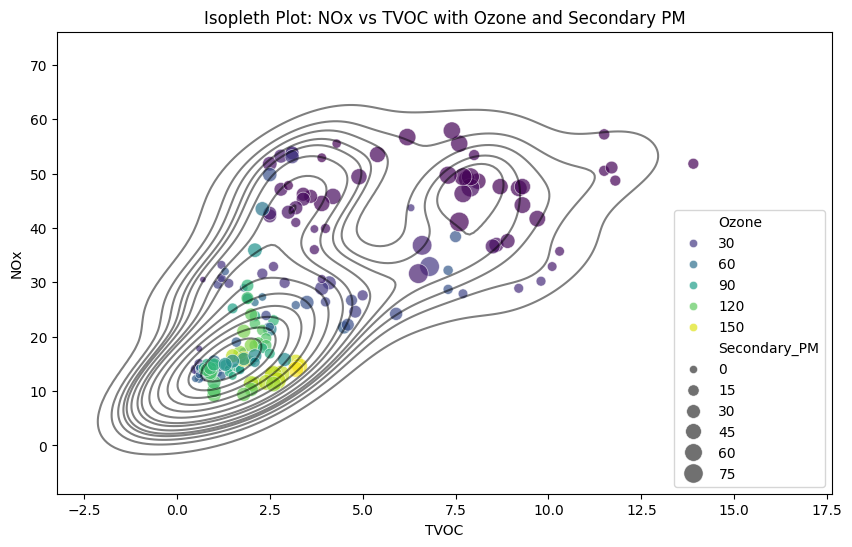

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
# Example data structure for demonstration purposes
# df = pd.DataFrame({
#     'From Date': pd.date_range(start='2024-04-20', periods=10, freq='D'),
#     'CO': np.random.rand(10),
#     'NOx': np.random.rand(10) * 100,
#     'TVOC': np.random.rand(10) * 100,
#     'Ozone': np.random.rand(10) * 50,
#     'PM2p5_Pred': np.random.rand(10),
#     'PM2.5': np.random.rand(10),
#     'Secondary_PM': np.random.rand(10) * 10
# })

# Filter DataFrames as shown in your code
central_date = pd.Timestamp('2024-04-22')

before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

before_fire_df = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
during_fire_df = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
after_fire_df = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Select a DataFrame for plotting (e.g., during_fire_df)
plot_df = during_fire_df

# Create a scatter plot with isopleths
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='TVOC',
    y='NOx',
    hue='Ozone',
    size='Secondary_PM',
    sizes=(20, 200),  # Size range for points
    palette='viridis',
    alpha=0.7,
    edgecolor='w'
)

# Add contour lines
sns.kdeplot(
    data=plot_df,
    x='TVOC',
    y='NOx',
    levels=15,
    color='k',
    alpha=0.5
)

# Customize plot
plt.title('Isopleth Plot: NOx vs TVOC with Ozone and Secondary PM')
plt.xlabel('TVOC')
plt.ylabel('NOx')
plt.colorbar(label='Ozone Concentration')
plt.grid(True)
plt.show()


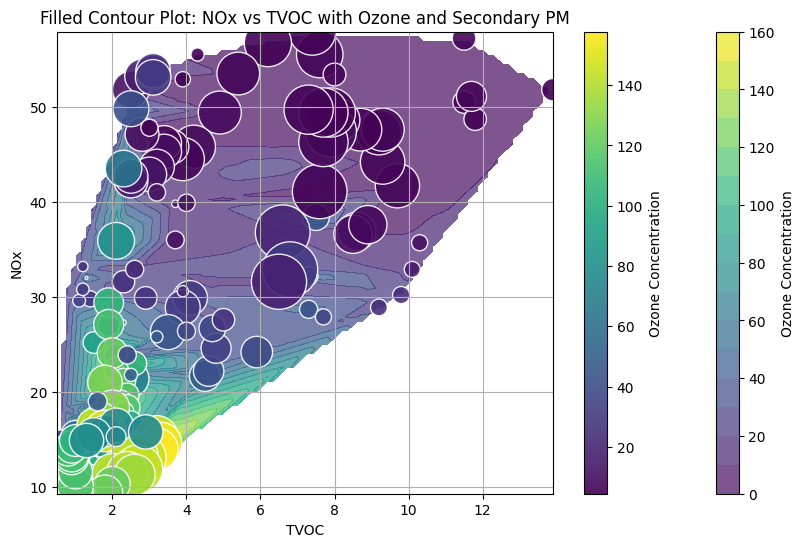

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Example data structure for demonstration purposes
# df = pd.DataFrame({
#     'From Date': pd.date_range(start='2024-04-20', periods=10, freq='D'),
#     'CO': np.random.rand(10),
#     'NOx': np.random.rand(10) * 100,
#     'TVOC': np.random.rand(10) * 100,
#     'Ozone': np.random.rand(10) * 50,
#     'PM2p5_Pred': np.random.rand(10),
#     'PM2.5': np.random.rand(10),
#     'Secondary_PM': np.random.rand(10) * 10
# })

# Assuming 'df' is your DataFrame
# Filter DataFrames as shown in your code
central_date = pd.Timestamp('2024-04-22')

before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

before_fire_df = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
during_fire_df = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
after_fire_df = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Select a DataFrame for plotting (e.g., during_fire_df)
plot_df = during_fire_df

# Create grid points for contour plot
xi = np.linspace(plot_df['TVOC'].min(), plot_df['TVOC'].max(), 100)
yi = np.linspace(plot_df['NOx'].min(), plot_df['NOx'].max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate Ozone values to the grid
zi = griddata((plot_df['TVOC'], plot_df['NOx']), plot_df['Ozone'], (xi, yi), method='linear')

# Create filled contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(xi, yi, zi, levels=15, cmap='viridis', alpha=0.7)
plt.colorbar(contour, label='Ozone Concentration')

# Add scatter points
scatter = plt.scatter(
    x=plot_df['TVOC'],
    y=plot_df['NOx'],
    c=plot_df['Ozone'],  # Color by Ozone
    s=plot_df['Secondary_PM'] * 20,  # Size by Secondary_PM
    cmap='viridis',
    edgecolor='w',
    alpha=0.9
)

# Customize plot
plt.title('Filled Contour Plot: NOx vs TVOC with Ozone and Secondary PM')
plt.xlabel('TVOC')
plt.ylabel('NOx')

# Add colorbar for scatter
cbar_scatter = plt.colorbar(scatter)
cbar_scatter.set_label('Ozone Concentration')

plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12856\1654297307.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


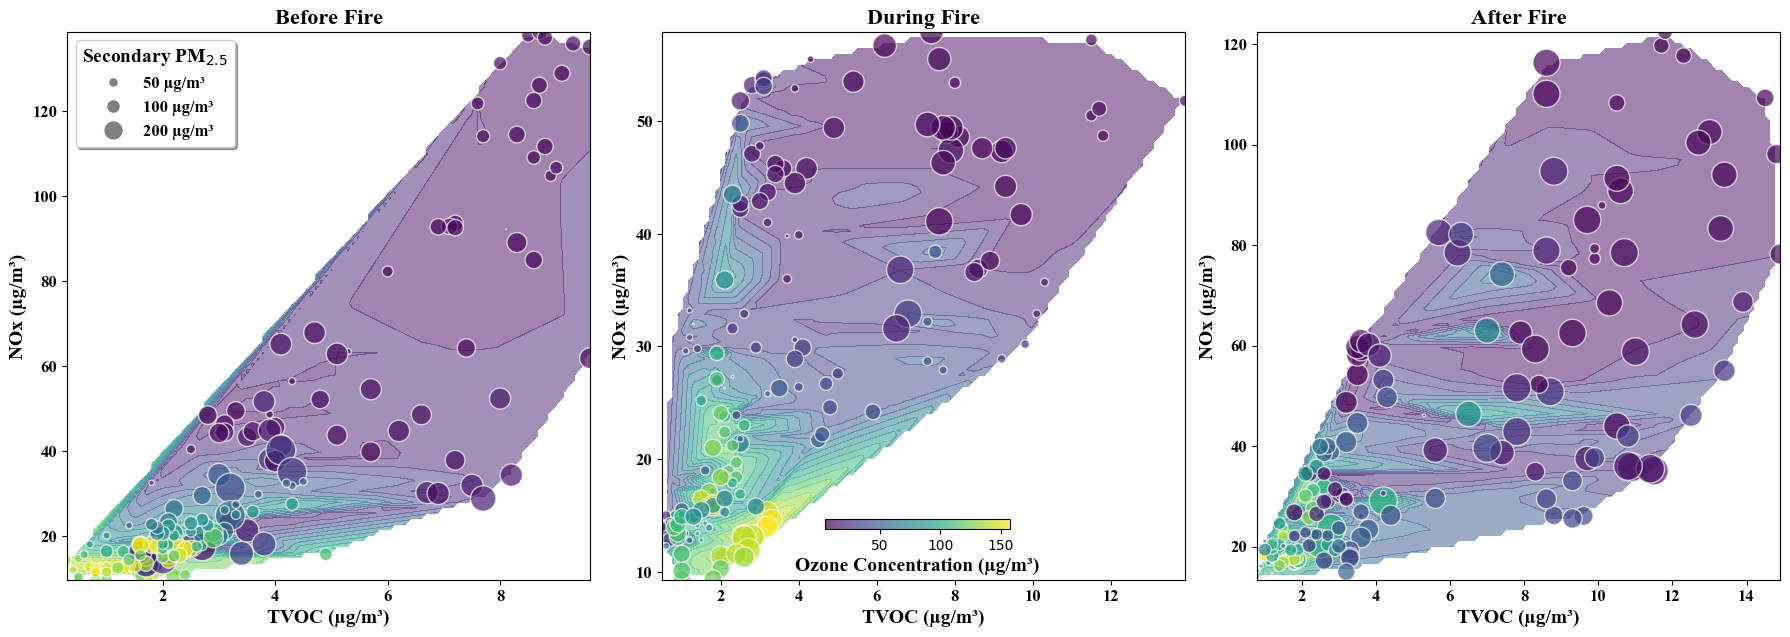

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Example DataFrame for demonstration purposes
# df = pd.DataFrame({
#     'From Date': pd.date_range(start='2024-04-20', periods=30, freq='D'),
#     'CO': np.random.rand(30),
#     'NOx': np.random.rand(30) * 100,
#     'TVOC': np.random.rand(30) * 100,
#     'Ozone': np.random.rand(30) * 50,
#     'PM2p5_Pred': np.random.rand(30),
#     'PM2.5': np.random.rand(30),
#     'Secondary_PM': np.random.rand(30) * 10
# })

# Assuming 'df' is your DataFrame
# Define the central date and filter DataFrames
central_date = pd.Timestamp('2024-04-22')

before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

before_fire_df = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
during_fire_df = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
after_fire_df = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to create contour plots
def create_isopleth(ax, plot_df, title):
    # Create grid points for contour plot
    xi = np.linspace(plot_df['TVOC'].min(), plot_df['TVOC'].max(), 100)
    yi = np.linspace(plot_df['NOx'].min(), plot_df['NOx'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate Ozone values to the grid
    zi = griddata((plot_df['TVOC'], plot_df['NOx']), plot_df['Ozone'], (xi, yi), method='linear')

    # Create filled contour plot
    contour = ax.contourf(xi, yi, zi, levels=15, cmap='viridis', alpha=0.5)
    ax.set_title(title, fontsize=16, fontweight='bold', family='Times New Roman')
    ax.set_xlabel('TVOC (µg/m³)', fontsize=14, fontweight='bold', family='Times New Roman')
    ax.set_ylabel('NOx (µg/m³)', fontsize=14, fontweight='bold', family='Times New Roman')

    # Add scatter points
    scatter = ax.scatter(
        x=plot_df['TVOC'],
        y=plot_df['NOx'],
        c=plot_df['Ozone'],  # Color by Ozone
        s=plot_df['Secondary_PM'] * 5,  # Size by Secondary_PM
        cmap='viridis',
        edgecolor='w',
        alpha=0.7
    )
    
    return scatter

# Create isopleths for each period
scatter_before = create_isopleth(axes[0], before_fire_df, 'Before Fire')
scatter_during = create_isopleth(axes[1], during_fire_df, 'During Fire')
scatter_after = create_isopleth(axes[2], after_fire_df, 'After Fire')

# Add colorbar for Ozone
cbar = fig.colorbar(scatter_during, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)  # Adjusted pad value
cbar.set_label('Ozone Concentration (µg/m³)', fontsize=14, fontweight='bold', family='Times New Roman')

# Add a legend for Secondary_PM
sizes = [50, 100, 200]  # Example sizes for the legend
labels = [f'{size} µg/m³' for size in sizes]
scatter_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, labels)]
axes[0].legend(
    handles=scatter_legend,
    title='Secondary PM$_{2.5}$',  # Subscript formatting
    loc='upper left',
    fontsize=12,
    frameon=True,
    shadow=True,
    title_fontproperties={'weight': 'bold', 'size': 14, 'family': 'Times New Roman'},
    prop={'weight': 'bold', 'size': 12, 'family': 'Times New Roman'}  # Apply font properties to legend text
)

# Customize font properties for all axes
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(12)
        label.set_fontweight('bold')
        label.set_family('Times New Roman')

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12856\3436762911.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_fire_df['Hour'] = before_fire_df['From Date'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_12856\3436762911.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_fire_df['Hour'] = during_fire_df['From Date'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_12856\3436762911.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

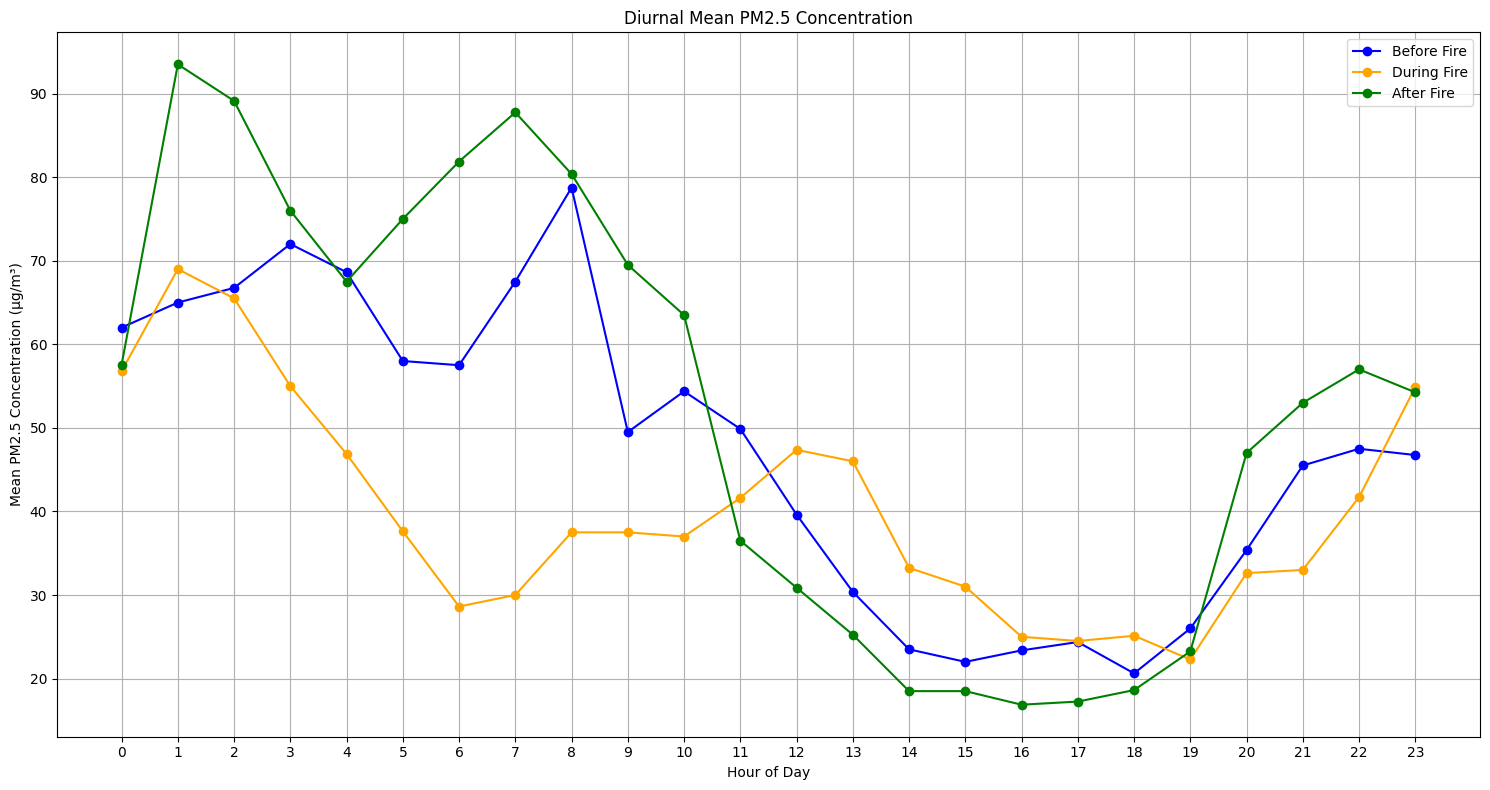

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter DataFrames for each period
before_fire_df = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
during_fire_df = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
after_fire_df = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Extract hour from 'From Date' for grouping
before_fire_df['Hour'] = before_fire_df['From Date'].dt.hour
during_fire_df['Hour'] = during_fire_df['From Date'].dt.hour
after_fire_df['Hour'] = after_fire_df['From Date'].dt.hour

# Calculate mean PM2.5 for each hour
mean_before = before_fire_df.groupby('Hour')['PM2.5'].mean()
mean_during = during_fire_df.groupby('Hour')['PM2.5'].mean()
mean_after = after_fire_df.groupby('Hour')['PM2.5'].mean()

# Plotting
plt.figure(figsize=(15, 8))

# Plot mean PM2.5 for each period
plt.plot(mean_before.index, mean_before, label='Before Fire', color='blue', marker='o')
plt.plot(mean_during.index, mean_during, label='During Fire', color='orange', marker='o')
plt.plot(mean_after.index, mean_after, label='After Fire', color='green', marker='o')

# Customize plot
plt.title('Diurnal Mean PM2.5 Concentration')
plt.xlabel('Hour of Day')
plt.ylabel('Mean PM2.5 Concentration (µg/m³)')
plt.xticks(range(0, 24))  # Show all hours
plt.legend()
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_52188\2091773769.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_fire_df['Hour'] = before_fire_df['From Date'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_52188\2091773769.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_fire_df['Hour'] = during_fire_df['From Date'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_52188\2091773769.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

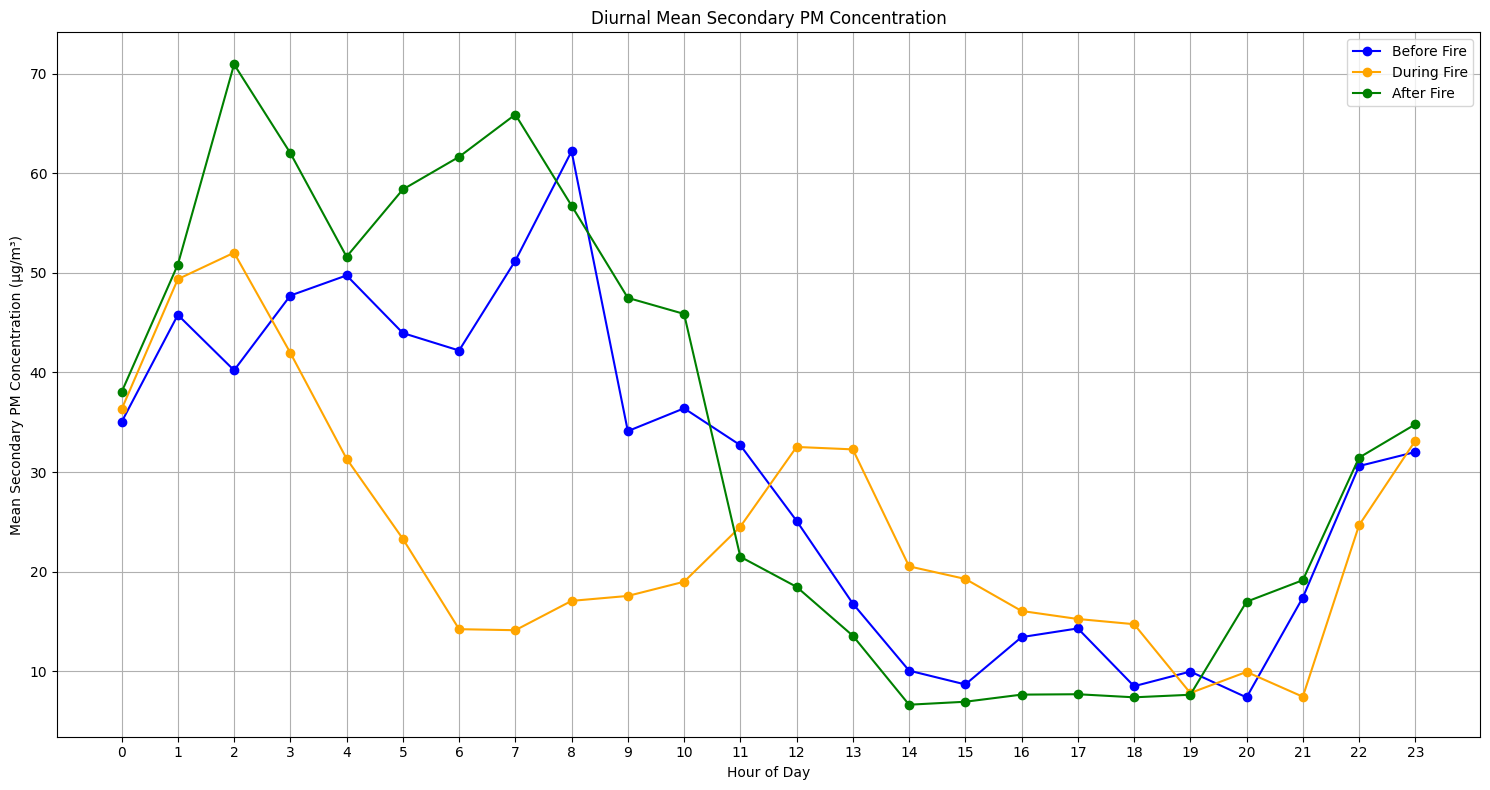

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter DataFrames for each period
before_fire_df = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
during_fire_df = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
after_fire_df = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Extract hour from 'From Date' for grouping
before_fire_df['Hour'] = before_fire_df['From Date'].dt.hour
during_fire_df['Hour'] = during_fire_df['From Date'].dt.hour
after_fire_df['Hour'] = after_fire_df['From Date'].dt.hour

# Calculate mean Secondary PM for each hour
mean_before_secondary = before_fire_df.groupby('Hour')['Secondary_PM'].mean()
mean_during_secondary = during_fire_df.groupby('Hour')['Secondary_PM'].mean()
mean_after_secondary = after_fire_df.groupby('Hour')['Secondary_PM'].mean()

# Plotting
plt.figure(figsize=(15, 8))

# Plot mean Secondary PM for each period
plt.plot(mean_before_secondary.index, mean_before_secondary, label='Before Fire', color='blue', marker='o')
plt.plot(mean_during_secondary.index, mean_during_secondary, label='During Fire', color='orange', marker='o')
plt.plot(mean_after_secondary.index, mean_after_secondary, label='After Fire', color='green', marker='o')

# Customize plot
plt.title('Diurnal Mean Secondary PM Concentration')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Secondary PM Concentration (µg/m³)')
plt.xticks(range(0, 24))  # Show all hours
plt.legend()
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_52188\3499352671.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_fire_df['Hour'] = before_fire_df['From Date'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_52188\3499352671.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_fire_df['Hour'] = during_fire_df['From Date'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_52188\3499352671.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

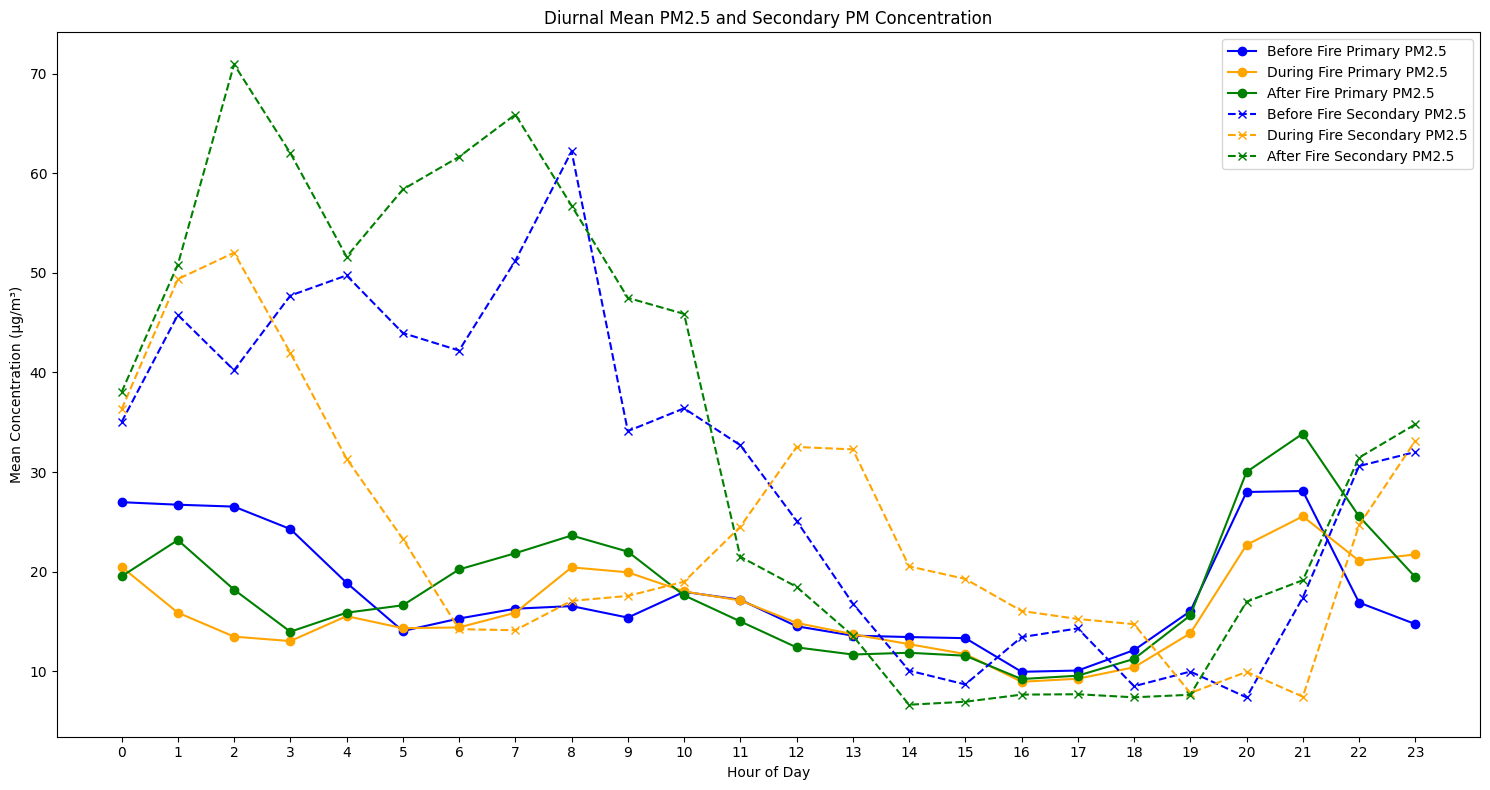

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (ensure df is defined previously with your data)
# df = pd.read_excel(data_path, sheet_name=1)  # Uncomment and set your data loading here

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter DataFrames for each period
before_fire_df = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
during_fire_df = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
after_fire_df = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Extract hour from 'From Date' for grouping
before_fire_df['Hour'] = before_fire_df['From Date'].dt.hour
during_fire_df['Hour'] = during_fire_df['From Date'].dt.hour
after_fire_df['Hour'] = after_fire_df['From Date'].dt.hour

# Calculate mean PM2.5 for each hour
mean_before = before_fire_df.groupby('Hour')['PM2p5_Pred'].mean()
mean_during = during_fire_df.groupby('Hour')['PM2p5_Pred'].mean()
mean_after = after_fire_df.groupby('Hour')['PM2p5_Pred'].mean()

# Calculate mean Secondary PM for each hour
mean_before_secondary = before_fire_df.groupby('Hour')['Secondary_PM'].mean()
mean_during_secondary = during_fire_df.groupby('Hour')['Secondary_PM'].mean()
mean_after_secondary = after_fire_df.groupby('Hour')['Secondary_PM'].mean()

# Plotting
plt.figure(figsize=(15, 8))

# Plot mean PM2.5 for each period
plt.plot(mean_before.index, mean_before, label='Before Fire Primary PM2.5', color='blue', marker='o')
plt.plot(mean_during.index, mean_during, label='During Fire Primary PM2.5', color='orange', marker='o')
plt.plot(mean_after.index, mean_after, label='After Fire Primary PM2.5', color='green', marker='o')

# Plot mean Secondary PM for each period with dashed lines
plt.plot(mean_before_secondary.index, mean_before_secondary, label='Before Fire Secondary PM2.5', color='blue', linestyle='--', marker='x')
plt.plot(mean_during_secondary.index, mean_during_secondary, label='During Fire Secondary PM2.5', color='orange', linestyle='--', marker='x')
plt.plot(mean_after_secondary.index, mean_after_secondary, label='After Fire Secondary PM2.5', color='green', linestyle='--', marker='x')

# Customize plot
plt.title('Diurnal Mean PM2.5 and Secondary PM Concentration')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Concentration (µg/m³)')
plt.xticks(range(0, 24))  # Show all hours
plt.legend()
# plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


In [56]:
before_fire_df

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,RH,WS,WD,SR,BP,VWS,AT,RF,PM2p5_Pred,Secondary_PM
10464,2024-04-19 00:00:00,19-04-2024 00:15,58.0,277.0,85.8,65.9,104.8,35.5,4.5,2.92,...,45.0,0.4,2.0,6.0,982.0,NaN,27.7,0.0,44.5884,13.4116
10465,2024-04-19 00:15:00,19-04-2024 00:30,58.0,277.0,87.0,67.6,106.7,36.1,4.8,2.64,...,45.0,0.3,2.0,6.0,982.0,NaN,27.7,0.0,40.3128,17.6872
10466,2024-04-19 00:30:00,19-04-2024 00:45,58.0,277.0,90.6,66.6,109.1,37.6,4.8,2.56,...,45.0,0.3,2.0,6.0,981.0,NaN,27.5,0.0,39.0912,18.9088
10467,2024-04-19 00:45:00,19-04-2024 01:00,67.0,290.0,96.8,67.2,114.5,38.3,4.8,2.47,...,44.0,0.6,2.0,6.0,981.0,NaN,27.5,0.0,37.7169,29.2831
10468,2024-04-19 01:00:00,19-04-2024 01:15,67.0,290.0,99.3,69.2,117.5,38.5,5.4,2.45,...,44.0,0.3,2.0,6.0,981.0,NaN,27.7,0.0,37.4115,29.5885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10652,2024-04-20 23:00:00,20-04-2024 23:15,34.0,184.0,0.8,40.9,22.4,32.2,6.5,1.01,...,37.0,2.2,2.0,6.0,982.0,NaN,28.2,0.0,12.9280,21.0720
10653,2024-04-20 23:15:00,20-04-2024 23:30,34.0,184.0,0.6,38.0,20.7,31.0,6.3,1.01,...,38.0,1.9,2.0,6.0,982.0,NaN,28.1,0.0,12.9280,21.0720
10654,2024-04-20 23:30:00,20-04-2024 23:45,34.0,184.0,0.8,37.8,20.7,30.5,6.5,0.98,...,38.0,2.2,2.0,6.0,982.0,NaN,28.0,0.0,12.5440,21.4560
10655,2024-04-20 23:45:00,21-04-2024 00:00,30.0,160.0,1.0,39.7,22.0,30.4,6.2,0.97,...,38.0,1.8,2.0,6.0,982.0,NaN,27.9,0.0,12.4160,17.5840


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (ensure df is defined previously with your data)
# df = pd.read_excel(data_path, sheet_name=1)  # Uncomment and set your data loading here

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter DataFrames for each period
before_fire_df = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
during_fire_df = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
after_fire_df = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Calculate mean PM2.5 and Secondary PM for each period
mean_values = {
    'Before Fire': {
        'Mean PM2.5': before_fire_df['PM2.5'].mean(),
        'Mean Secondary PM': before_fire_df['Secondary_PM'].mean()
    },
    'During Fire': {
        'Mean PM2.5': during_fire_df['PM2.5'].mean(),
        'Mean Secondary PM': during_fire_df['Secondary_PM'].mean()
    },
    'After Fire': {
        'Mean PM2.5': after_fire_df['PM2.5'].mean(),
        'Mean Secondary PM': after_fire_df['Secondary_PM'].mean()
    }
}

# Calculate S/PM2.5 % for each period
for period, values in mean_values.items():
    mean_pm2_5 = values['Mean PM2.5']
    mean_secondary_pm = values['Mean Secondary PM']
    
    if mean_pm2_5 != 0:  # Avoid division by zero
        values['S/PM2.5 %'] = (mean_secondary_pm / mean_pm2_5) * 100
    else:
        values['S/PM2.5 %'] = None  # Handle case of zero PM2.5

# Display the estimated values
for period, values in mean_values.items():
    print(f"{period}: Mean PM2.5 = {values['Mean PM2.5']:.2f} µg/m³, "
          f"Mean Secondary PM = {values['Mean Secondary PM']:.2f} µg/m³, "
          f"S/PM2.5 % = {values['S/PM2.5 %']:.2f} %")


Before Fire: Mean PM2.5 = 47.69 µg/m³, Mean Secondary PM = 29.96 µg/m³, S/PM2.5 % = 62.83 %
During Fire: Mean PM2.5 = 40.10 µg/m³, Mean Secondary PM = 24.10 µg/m³, S/PM2.5 % = 60.10 %
After Fire: Mean PM2.5 = 51.55 µg/m³, Mean Secondary PM = 33.74 µg/m³, S/PM2.5 % = 65.45 %


In [66]:
# Calculate mean and standard deviation for PM2.5 and Secondary PM for each period
stats_values = {
    'Before Fire': {
        'Mean PM2.5': before_fire_df['PM2.5'].mean(),
        'Std Dev PM2.5': before_fire_df['PM2.5'].std(),
        'Mean Secondary PM': before_fire_df['Secondary_PM'].mean(),
        'Std Dev Secondary PM': before_fire_df['Secondary_PM'].std()
    },
    'During Fire': {
        'Mean PM2.5': during_fire_df['PM2.5'].mean(),
        'Std Dev PM2.5': during_fire_df['PM2.5'].std(),
        'Mean Secondary PM': during_fire_df['Secondary_PM'].mean(),
        'Std Dev Secondary PM': during_fire_df['Secondary_PM'].std()
    },
    'After Fire': {
        'Mean PM2.5': after_fire_df['PM2.5'].mean(),
        'Std Dev PM2.5': after_fire_df['PM2.5'].std(),
        'Mean Secondary PM': after_fire_df['Secondary_PM'].mean(),
        'Std Dev Secondary PM': after_fire_df['Secondary_PM'].std()
    }
}

# Display the estimated values along with standard deviations
for period, values in stats_values.items():
    print(f"{period}: Mean PM2.5 = {values['Mean PM2.5']:.2f} µg/m³, "
          f"Std Dev PM2.5 = {values['Std Dev PM2.5']:.2f} µg/m³, "
          f"Mean Secondary PM = {values['Mean Secondary PM']:.2f} µg/m³, "
          f"Std Dev Secondary PM = {values['Std Dev Secondary PM']:.2f} µg/m³")


Before Fire: Mean PM2.5 = 47.69 µg/m³, Std Dev PM2.5 = 21.45 µg/m³, Mean Secondary PM = 29.96 µg/m³, Std Dev Secondary PM = 20.48 µg/m³
During Fire: Mean PM2.5 = 40.10 µg/m³, Std Dev PM2.5 = 21.22 µg/m³, Mean Secondary PM = 24.10 µg/m³, Std Dev Secondary PM = 20.66 µg/m³
After Fire: Mean PM2.5 = 51.55 µg/m³, Std Dev PM2.5 = 28.89 µg/m³, Mean Secondary PM = 33.74 µg/m³, Std Dev Secondary PM = 25.87 µg/m³


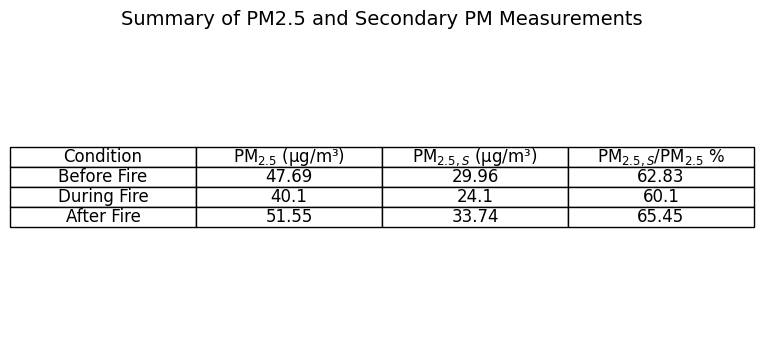

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the provided statistics
data = {
    'Condition': ['Before Fire', 'During Fire', 'After Fire'],
    'PM$_{2.5}$ (µg/m³)': [47.69, 40.10, 51.55],
    'PM$_{2.5,S}$ (µg/m³)': [29.96, 24.10, 33.74],
    'PM$_{2.5,S}$/PM$_{2.5}$ %': [62.83, 60.10, 65.45]
}

summary_df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(8, 4))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table size

# Set title
plt.title('Summary of PM2.5 and Secondary PM Measurements', fontsize=14)
plt.show()
